In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("/content/Electric_Vehicle_Population_Data.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/Electric_Vehicle_Population_Data.csv'

In [ ]:
df.shape

(52242, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52242 entries, 0 to 52241
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         52242 non-null  object 
 1   County                                             52242 non-null  object 
 2   City                                               52242 non-null  object 
 3   State                                              52242 non-null  object 
 4   Postal Code                                        52242 non-null  int64  
 5   Model Year                                         52242 non-null  int64  
 6   Make                                               52242 non-null  object 
 7   Model                                              52242 non-null  object 
 8   Electric Vehicle Type                              52242 non-null  object 
 9   Clean 

In [ ]:
df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    1
dtype: int64

In [ ]:
# prompt: number of unique values in each column

df.nunique()


VIN (1-10)                                            7775
County                                                  20
City                                                   152
State                                                    1
Postal Code                                            217
Model Year                                              19
Make                                                    38
Model                                                  133
Electric Vehicle Type                                    2
Clean Alternative Fuel Vehicle (CAFV) Eligibility        3
Electric Range                                          99
Base MSRP                                               29
Legislative District                                    42
DOL Vehicle ID                                       52242
Vehicle Location                                       217
Electric Utility                                        27
2020 Census Tract                                     10

We can see that there are 133 models in our database

In [ ]:
ev_counts_by_make = df['Make'].value_counts().nlargest(20)
print(ev_counts_by_make)

Make
TESLA            24168
NISSAN            4095
CHEVROLET         3694
BMW               2320
FORD              2117
KIA               2058
TOYOTA            1655
JEEP              1428
VOLKSWAGEN        1404
HYUNDAI           1282
VOLVO             1279
RIVIAN            1196
AUDI              1076
CHRYSLER           929
MERCEDES-BENZ      490
DODGE              429
PORSCHE            353
SUBARU             349
POLESTAR           298
MINI               264
Name: count, dtype: int64


Tesla is by far the largest maker of EV.

<ipython-input-21-38a1d61288ee>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_counts_by_make.values, y=ev_counts_by_make.index, palette="viridis")


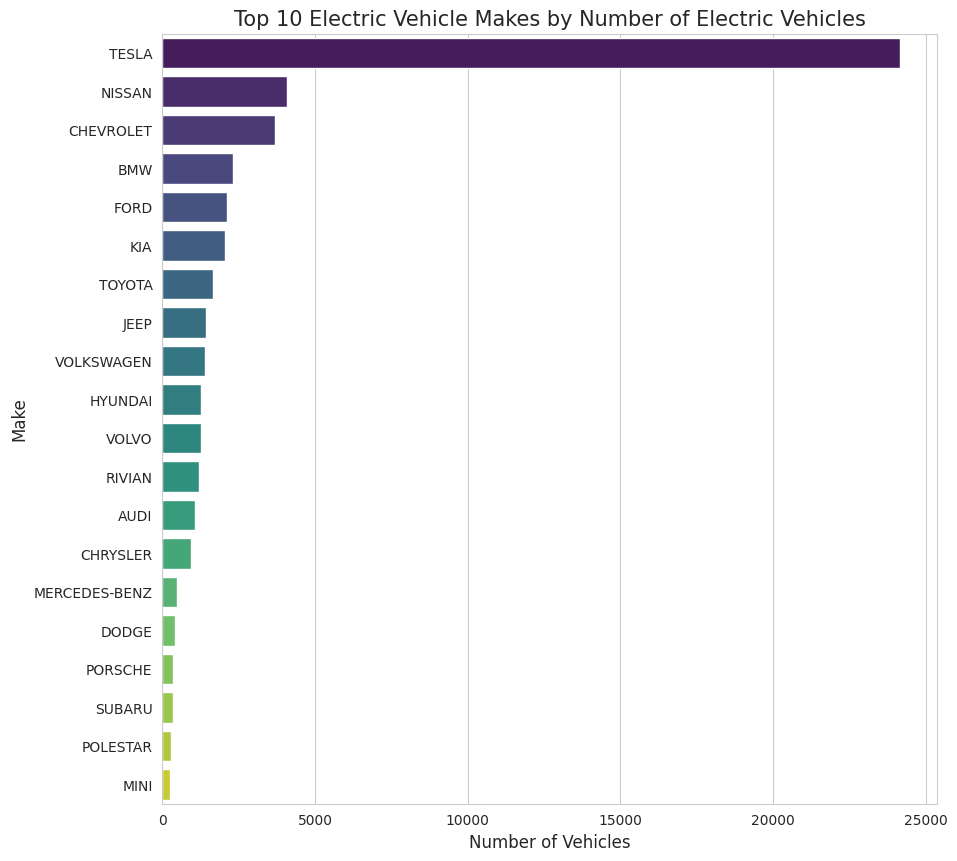

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 10))
sns.barplot(x=ev_counts_by_make.values, y=ev_counts_by_make.index, palette="viridis")
plt.title('Top 10 Electric Vehicle Makes by Number of Electric Vehicles', fontsize=15)
plt.xlabel('Number of Vehicles', fontsize=12)
plt.ylabel('Make', fontsize=12)
plt.show()

In [ ]:
ev_counts_by_model = df['Model'].value_counts().nlargest(25)
print(ev_counts_by_model)

Model
MODEL Y           10862
MODEL 3            9203
LEAF               3952
MODEL S            2244
BOLT EV            1903
MODEL X            1842
WRANGLER           1194
VOLT               1132
ID.4               1070
PACIFICA            929
NIRO                924
MUSTANG MACH-E      851
X5                  764
PRIUS PRIME         700
R1S                 676
IONIQ 5             647
RAV4 PRIME          597
BOLT EUV            593
EV6                 585
I3                  579
R1T                 455
XC90                443
HORNET              429
FUSION              381
C-MAX               358
Name: count, dtype: int64


Models Y and 3 are very popular

<ipython-input-25-441c8cd9ad86>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_counts_by_model.values, y=ev_counts_by_model.index, palette="viridis")


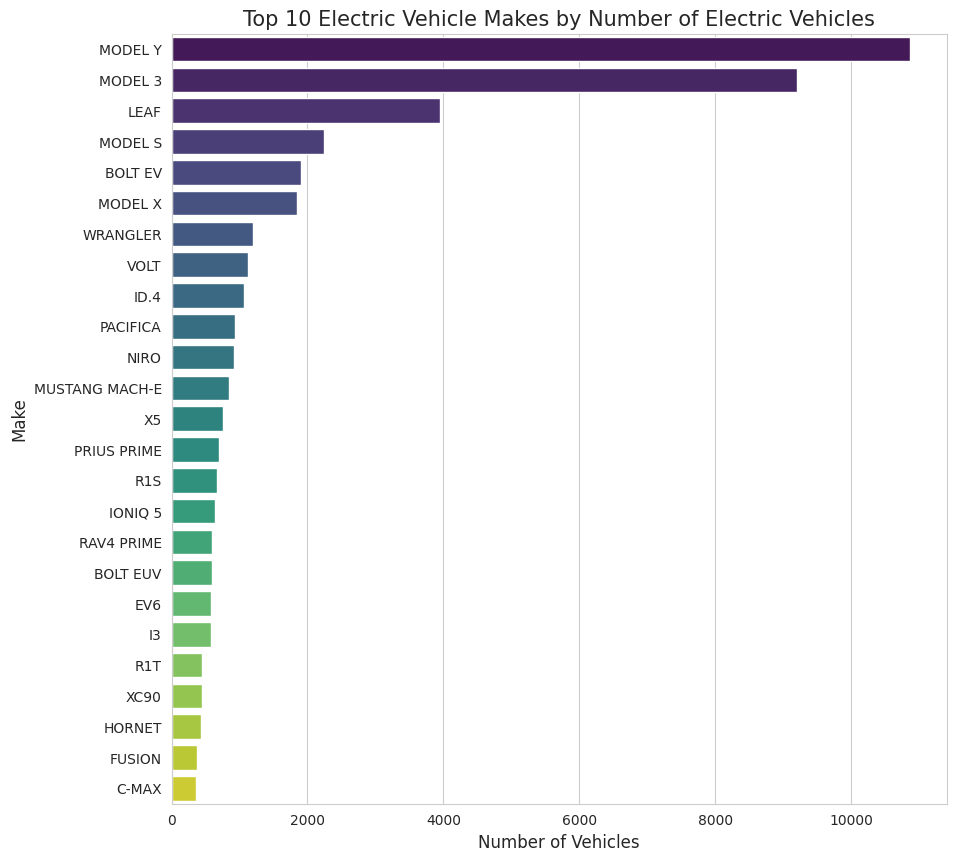

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 10))
sns.barplot(x=ev_counts_by_model.values, y=ev_counts_by_model.index, palette="viridis")
plt.title('Top 10 Electric Vehicle Makes by Number of Electric Vehicles', fontsize=15)
plt.xlabel('Number of Vehicles', fontsize=12)
plt.ylabel('Make', fontsize=12)
plt.show()

Number of models by each company

In [ ]:


make = df.groupby('Model')['Make'].unique()
make = make.value_counts().sort_values(ascending=False)
print(make)

Make
[BMW]                     14
[AUDI]                    12
[MERCEDES-BENZ]           10
[HYUNDAI]                  8
[KIA]                      8
[FORD]                     8
[CHEVROLET]                7
[VOLVO]                    7
[TOYOTA]                   6
[TESLA]                    5
[PORSCHE]                  4
[GENESIS]                  3
[SMART]                    3
[RIVIAN]                   3
[CADILLAC]                 3
[JEEP]                     2
[MAZDA]                    2
[VOLKSWAGEN]               2
[BENTLEY]                  2
[LINCOLN]                  2
[MITSUBISHI]               2
[FISKER]                   2
[SUBARU]                   2
[LEXUS]                    2
[LAND ROVER]               2
[NISSAN]                   2
[MINI]                     2
[HONDA]                    2
[POLESTAR]                 1
[AZURE DYNAMICS]           1
[ALFA ROMEO]               1
[ROLLS ROYCE]              1
[TH!NK]                    1
[LUCID]                    1
[CHRYSLER

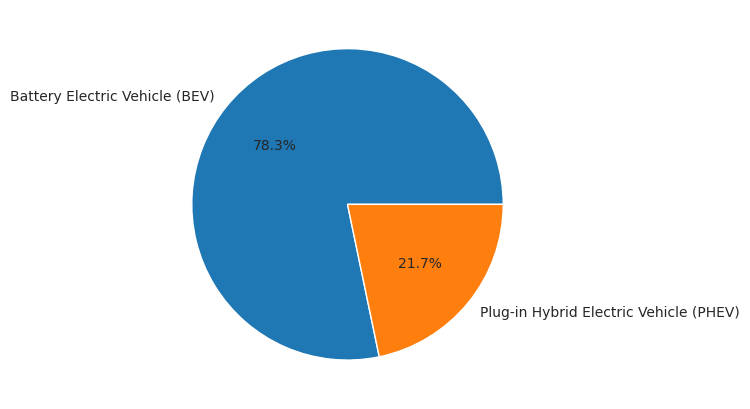

In [ ]:
df['Electric Vehicle Type'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()